# Yankees - Event Propensity - Next Event Buyer
<<<<<<< local
* StelllarAlgo Data Science
=======
>>>>>>> remote
* Ryan Kazmerik, Nakisa Rad, Joey Lai, Shawn Sutherland, Matt Bahler, Pat Faith
* Feb 09, 2022

## Hypothesis
Each team has different tier (or quality) of games, based on day of the week, time of the season, opponent, etc. We think that by using previous buyer behaviour we can make a prediction on whether the fan will purchase for the next game or not.

## Experiment
This section details our experiment including querying data, data transformations, feature selection and modelling.

In [ ]:
import getpass
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import warnings

<<<<<<< local
=======
from pandas_profiling import ProfileReport
>>>>>>> remote
from pycaret.classification import *

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [ ]:
pip install pycaret==2.3.3

### Let's connect to MSSQL and run a stored proc to get our dataset:

In [ ]:
# connect to SQL Server.
SERVER = '54.164.224.129'  
<<<<<<< local
DATABASE = 'stlrYankees' 
=======
DATABASE = 'stlrRays' 
>>>>>>> remote
USERNAME = 'dsAdminWrite' 
PASSWORD = getpass.getpass(prompt='Enter your password')
CNXN = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+SERVER+';DATABASE='+DATABASE+';UID='+USERNAME+';PWD='+ PASSWORD)

In [ ]:
cursor = CNXN.cursor()

<<<<<<< local
query =  f"""
    select * FROM datascience.yankees.event_propensity_training_noFirstPurchases2
    """
=======
query = "SELECT * FROM datascience.yankees.event_propensity_training_noFirstPurchases2"
>>>>>>> remote
    
df = pd.read_sql(query, CNXN)
    
CNXN.commit()
cursor.close()

In [ ]:
cor = df.corr()

corr = df_correlated.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
df.info()

<span style="color:red">**<<<<<<< local**</span>

In [ ]:
#profile = ProfileReport(df, minimal=True)
#profile.to_file(output_file="yankees_pandas_profile_events.html")

### We should specify the features used in our model:

<span style="color:red">**=======**</span>

### We should create separate out some data for training the model and some for evaluating:

<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
# copy your main dataframe
df_dataset = df

df_train = df_dataset.sample(frac=0.85, random_state=786)
df_eval = df_dataset.drop(df_train.index)

df_train.reset_index(drop=True)
df_eval.reset_index(drop=True)

# print out the number of records for training and eval
print('Data for Modeling: ' + str(df_train.shape))
print('Unseen Data For Predictions: ' + str(df_eval.shape), end="\n\n")

In [ ]:
df_train.head()

### Now we can model the data using a binary classification prediction for the target field to see how likely a customer is to purchase:

In [ ]:
setup(
    data= df_train, 
    target="did_purchase", 
    train_size = 0.80,
    data_split_shuffle=True,
    categorical_features=["inMarket"],
    date_features=["eventDate"],
<<<<<<< local
    ignore_features=["dimCustomerMasterId","minDaysOut","maxDaysOut"],
=======
    ignore_features=[
        "dimCustomerMasterId",
        "eventName",
        "minDaysOut",
        "maxDaysOut"
    ],
>>>>>>> remote
    silent=True,
    verbose=False,
    numeric_features=[
        "distanceToVenue",
        "events_purchased",
        "frequency_eventDay",
        "frequency_opponent",
        "frequency_eventTime",
        "recent_clickRate",
<<<<<<< local
        "recent_openRate"
=======
        "recent_openRate",
        "tenure"
>>>>>>> remote
    ]
);

In [ ]:
model_matrix = compare_models(
<<<<<<< local
    fold=10,
    include=["xgboost"]
=======
    fold= 10, 
    include= ["lr"]
>>>>>>> remote
)

### The top model is performing well, so let's compare it against our test dataset:

In [138]:
best_model = create_model(
    model_matrix, 
    fold= 10
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8025,0.8790,0.7847,0.8135,0.7988,0.6051,0.6054
1,0.7966,0.8775,0.7735,0.8107,0.7917,0.5931,0.5938
2,0.8022,0.8786,0.7827,0.8142,0.7981,0.6044,0.6048
3,0.8023,0.8762,0.7910,0.8089,0.7999,0.6045,0.6046
4,0.8026,0.8796,0.7877,0.8117,0.7995,0.6053,0.6055
5,0.8035,0.8817,0.7884,0.8127,0.8004,0.6069,0.6072
6,0.8051,0.8810,0.7865,0.8166,0.8013,0.6101,0.6105
7,0.8037,0.8793,0.7804,0.8183,0.7989,0.6074,0.6080
8,0.7998,0.8780,0.7863,0.8078,0.7969,0.5995,0.5997
9,0.8018,0.8783,0.7853,0.8118,0.7983,0.6035,0.6038


### Let's load in our evaluation data and get propensity scores using the model:

In [ ]:
<<<<<<< local
df_inference = predict_model(final_model, data=df_eval, raw_score=True)
=======
df_inference = predict_model(best_model, data=df_eval, raw_score=True)
>>>>>>> remote
df_inference.head()

### Included are some metrics on did and did_not purchase:

In [ ]:
did_purchase = df_inference["Label"].value_counts()[1]
did_not_purchase = df_inference["Label"].value_counts()[0]
total_rows = df_inference["Label"].count()
purchase_percentage = round((did_purchase / total_rows), 2) * 100

print("Would purchase:", did_purchase)
print("Would not purchase:", did_not_purchase)
print("Purchase percentage:", purchase_percentage)

<span style="color:red">**<<<<<<< local**</span>

### Score_0 = Did Not Purchase, Score_1 = Did Purchase

<span style="color:red">**=======**</span>

### We can also see the correlation between the features and the target variable:

In [141]:
cor = df.corr()

df_correlated = df

corr = df_correlated.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,minDaysOut,maxDaysOut,dimCustomerMasterId,recent_openRate,recent_clickRate,distanceToVenue,tenure,did_purchase,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime
minDaysOut,1.00,0.98,0.10,-0.10,-0.05,-0.09,-0.03,0.36,0.02,-0.05,0.02,-0.06
maxDaysOut,0.98,1.00,0.01,-0.05,-0.01,0.01,0.07,-0.03,0.06,-0.15,-0.10,-0.16
dimCustomerMasterId,0.10,0.01,1.00,0.10,0.04,-0.14,0.06,0.39,0.07,0.13,0.13,0.12
recent_openRate,-0.10,-0.05,0.10,1.00,0.14,-0.03,-0.02,0.08,-0.03,0.09,0.06,0.10
recent_clickRate,-0.05,-0.01,0.04,0.14,1.00,-0.03,-0.03,0.07,-0.03,0.04,0.04,0.04
distanceToVenue,-0.09,0.01,-0.14,-0.03,-0.03,1.00,0.02,-0.24,-0.00,-0.06,-0.08,-0.09
tenure,-0.03,0.07,0.06,-0.02,-0.03,0.02,1.00,-0.13,0.95,-0.13,-0.18,-0.23
did_purchase,0.36,-0.03,0.39,0.08,0.07,-0.24,-0.13,1.00,-0.05,0.27,0.29,0.29
events_purchased,0.02,0.06,0.07,-0.03,-0.03,-0.00,0.95,-0.05,1.00,-0.12,-0.16,-0.22
frequency_opponent,-0.05,-0.15,0.13,0.09,0.04,-0.06,-0.13,0.27,-0.12,1.00,0.44,0.59


### Here we can see the distribution of fans who did and did not purchase : Score_0 = Did Not Purchase, Score_1 = Did Purchase

<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
df_inference.hist(column=['Score_0', 'Score_1'], figsize=(30,5), layout=(1,3));

### This plot lists the most important features for a correct prediction (either Score_0 or Score_1) in the model:

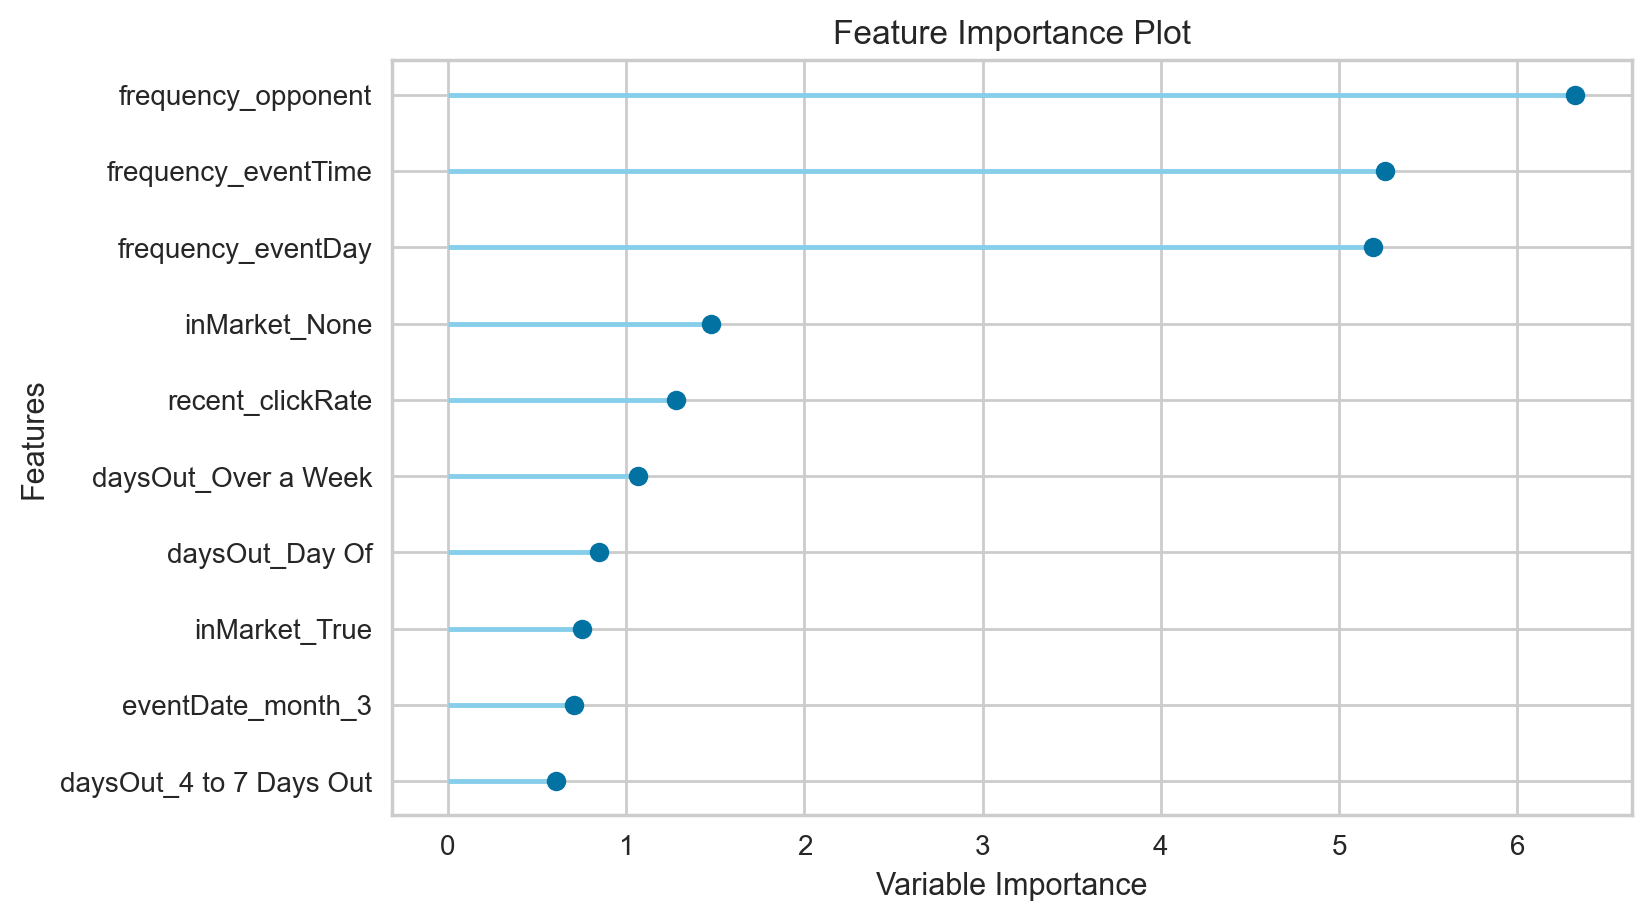

In [143]:
plot_model(best_model, plot='feature')

### This confusion matrix helps understand where the model guessed correctly or incorrectly based on the evaluation data:

In [ ]:
<<<<<<< local
plot_model(best_model, plot='feature')
=======
plot_model(best_model, plot='confusion_matrix')
>>>>>>> remote

### The AUC curve tells how much the model is capable of distinguishing between classes. The higher the curve, the better the model is at distiguishing classes:

In [ ]:
<<<<<<< local
plot_model(best_model, plot='confusion_matrix')
=======
plot_model(best_model, plot='auc')
>>>>>>> remote

<span style="color:red">**<<<<<<< local**</span>

## Observations
Here you can document some ideas on the results from above


<span style="color:red">**=======**</span>

### Let's load up some real events from previous events to see how the model scores the data:

In [148]:
cursor = CNXN.cursor()

query = """
    SELECT
        daysOut,
        dimCustomerMasterId,
        eventDate,
        events_purchased,
        frequency_opponent,
        frequency_eventDay,
        frequency_eventTime,
        inMarket,
        distanceToVenue,
        recent_openRate,
        recent_clickRate,
        tenure
    FROM 
        DataScience.yankees.event_propensity_scoring_20190330
"""
    
df_prev_scores = pd.read_sql(query, CNXN)
    
CNXN.commit()
cursor.close()

In [149]:
df_prev_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648764 entries, 0 to 1648763
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   daysOut              1648764 non-null  object        
 1   dimCustomerMasterId  1648764 non-null  int64         
 2   eventDate            1648764 non-null  datetime64[ns]
 3   events_purchased     1648764 non-null  float64       
 4   frequency_opponent   1648764 non-null  float64       
 5   frequency_eventDay   1647368 non-null  float64       
 6   frequency_eventTime  1648764 non-null  float64       
 7   inMarket             1406432 non-null  object        
 8   distanceToVenue      1406432 non-null  float64       
 9   recent_openRate      415456 non-null   float64       
 10  recent_clickRate     415456 non-null   float64       
 11  tenure               1648764 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
me

### Let's run the previous scores through the model for predictions:

In [150]:
df_scoring = predict_model(best_model, data=df_prev_scores, raw_score=True)
df_scoring.head()

,daysOut,dimCustomerMasterId,eventDate,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime,inMarket,distanceToVenue,recent_openRate,recent_clickRate,tenure,Label,Score_0,Score_1
0,Day Of,1671914,2019-03-30,1.0,0.0,0.0,0.022222,True,31.58,NaN,NaN,599,0,0.9033,0.0967
1,1 to 3 Days Out,1671914,2019-03-30,1.0,0.0,0.0,0.022222,True,31.58,NaN,NaN,599,0,0.8740,0.1260
2,4 to 7 Days Out,1671914,2019-03-30,1.0,0.0,0.0,0.022222,True,31.58,NaN,NaN,599,0,0.8799,0.1201
3,Over a Week,1671914,2019-03-30,1.0,0.0,0.0,0.022222,True,31.58,NaN,NaN,599,0,0.5789,0.4211
4,Day Of,1732044,2019-03-30,2.0,0.0,0.0,0.000000,True,18.70,0.0,0.0,601,0,0.9216,0.0784


### Included are some metrics on did and did_not purchase:

In [151]:
did_purchase = df_scoring["Label"].value_counts()[1]
did_not_purchase = df_scoring["Label"].value_counts()[0]
total_rows = df_scoring["Label"].count()
purchase_percentage = round((did_purchase / total_rows), 4) * 100

print("Would purchase:", did_purchase)
print("Would not purchase:", did_not_purchase)
print("Purchase percentage:", purchase_percentage)

Would purchase: 173047
Would not purchase: 1475717
Purchase percentage: 10.5


### We can also see the correlation between the features and the target variable:

In [152]:
cor2 = df_scoring.corr()

df_correlated2 = df_scoring

corr2 = df_correlated2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,dimCustomerMasterId,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime,distanceToVenue,recent_openRate,recent_clickRate,tenure,Label,Score_0,Score_1
dimCustomerMasterId,1.00,0.17,0.04,0.02,0.04,-0.09,0.14,0.08,0.04,0.06,-0.10,0.10
events_purchased,0.17,1.00,0.24,0.21,0.28,-0.09,0.13,0.08,0.14,0.12,-0.17,0.17
frequency_opponent,0.04,0.24,1.00,0.34,0.58,-0.04,0.05,0.03,-0.11,0.32,-0.38,0.38
frequency_eventDay,0.02,0.21,0.34,1.00,0.68,-0.02,0.05,0.01,-0.18,0.31,-0.40,0.40
frequency_eventTime,0.04,0.28,0.58,0.68,1.00,-0.04,0.06,0.03,-0.23,0.35,-0.45,0.45
distanceToVenue,-0.09,-0.09,-0.04,-0.02,-0.04,1.00,-0.04,-0.05,-0.03,-0.15,0.30,-0.30
recent_openRate,0.14,0.13,0.05,0.05,0.06,-0.04,1.00,0.11,0.02,0.17,-0.24,0.24
recent_clickRate,0.08,0.08,0.03,0.01,0.03,-0.05,0.11,1.00,0.00,0.27,-0.34,0.34
tenure,0.04,0.14,-0.11,-0.18,-0.23,-0.03,0.02,0.00,1.00,-0.30,0.41,-0.41
Label,0.06,0.12,0.32,0.31,0.35,-0.15,0.17,0.27,-0.30,1.00,-0.81,0.81


### Here we can see the distribution of fans who did and did not purchase : Score_0 = Did Not Purchase, Score_1 = Did Purchase

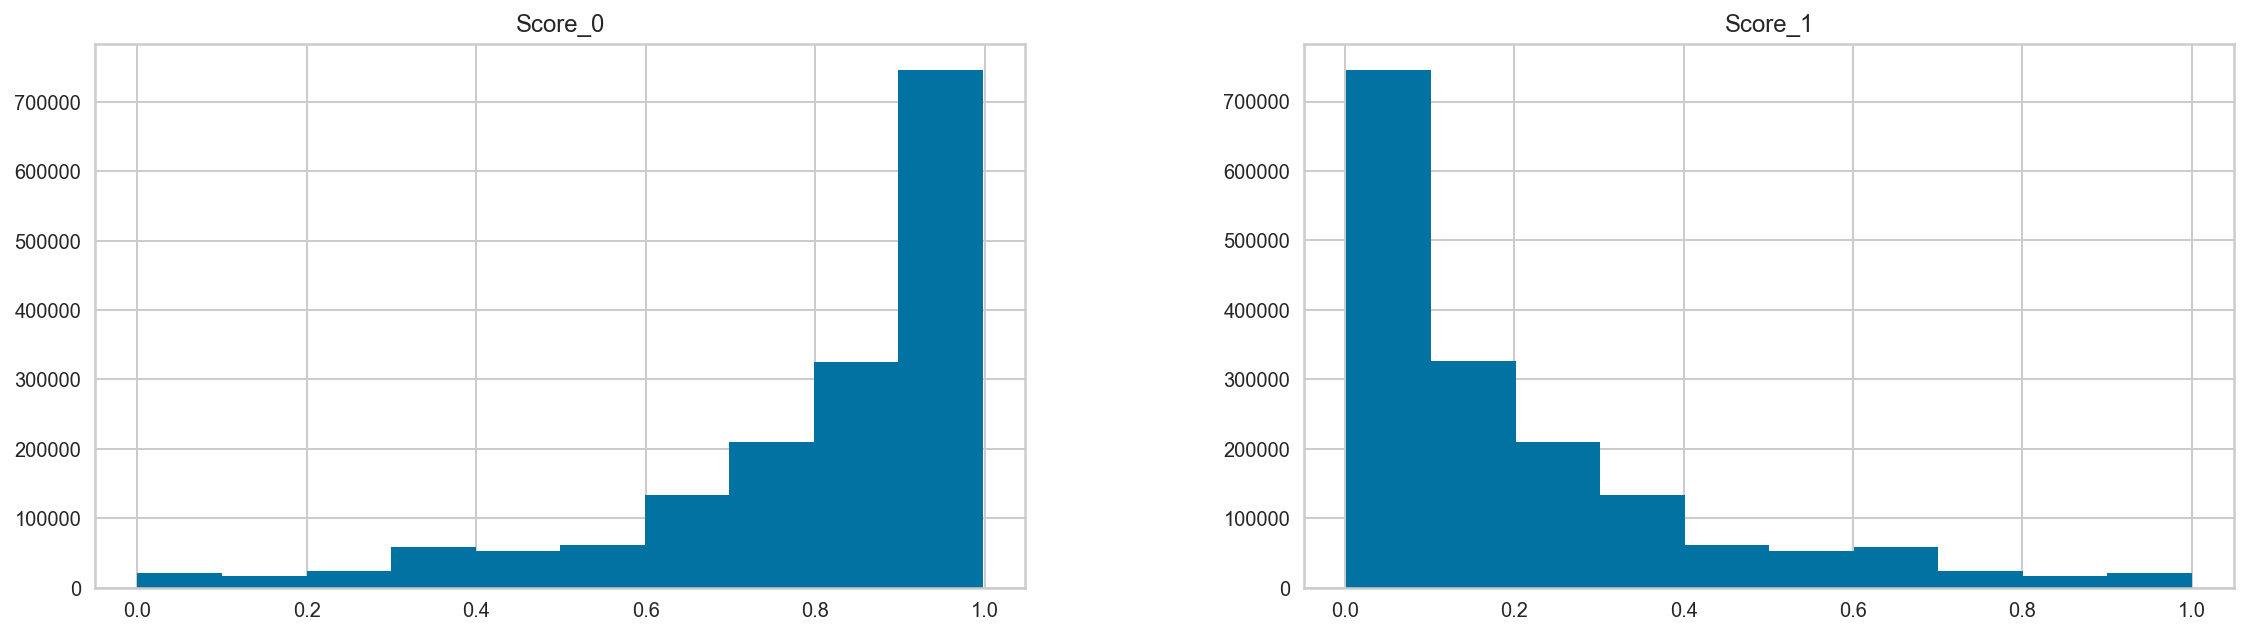

In [153]:
df_scoring.hist(column=['Score_0', 'Score_1'], figsize=(30,5), layout=(1,3));

In [ ]:
scoring_list = df_scoring.to_dict('records')

In [ ]:
max_dict = {}
for record in scoring_list:
    if record['dimCustomerMasterId'] not in max_dict:
        max_dict[record['dimCustomerMasterId']] = 0
    
    if record['Score_1'] > max_dict[record['dimCustomerMasterId']]:
        max_dict[record['dimCustomerMasterId']] = record['Score_1']

In [113]:
#max_scores = [{'id': k, 'score': v} for k, v in max_dict.items()]
#max_scores.sort(key = lambda v: -v["score"])

#df_max_scores = pd.DataFrame(max_scores)
#df_max_scores.to_csv('yankees_scoring_test.csv')

(412191, 2)

In [157]:
df_max_scores.head()

,id,score
0,1193100,1.0
1,8588,1.0
2,1715715,1.0
3,1836298,1.0
4,24188,1.0


In [124]:
#df1 = df_scoring.loc[df_scoring.groupby('dimCustomerMasterId', sort=False)['Score_1'].idxmax()]

In [128]:
#df1 = df1.sort_values(by='Score_1', ascending=False).reset_index()

In [129]:
#df1 = df1.filter(['dimCustomerMasterId','Score_1'], axis=1)

In [ ]:
#df1.head()

<span style="color:red">**>>>>>>> remote**</span>

<<<<<<< local
## Conclusions
=======
## Observations
>>>>>>> remote
Here you can talk about next steps, did the experiment work? If yes, what to do next? If no, why?